In [1]:
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt

location_based_analysis=pd.read_csv(r"F:\project.py\Intern Shipe for Cognize\TASK-4\Dataset .csv")
location_based_analysis

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [2]:
location_based_analysis=location_based_analysis.drop(columns=["Restaurant ID","Country Code","Address","Locality","Locality Verbose","Cuisines","Currency","Has Table booking","Has Online delivery","Is delivering now","Switch to order menu","Rating color","Rating text","Votes"])
    
location_based_analysis

,Restaurant Name,City,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating
0,Le Petit Souffle,Makati City,121.027535,14.565443,1100,3,4.8
1,Izakaya Kikufuji,Makati City,121.014101,14.553708,1200,3,4.5
2,Heat - Edsa Shangri-La,Mandaluyong City,121.056831,14.581404,4000,4,4.4
3,Ooma,Mandaluyong City,121.056475,14.585318,1500,4,4.9
4,Sambo Kojin,Mandaluyong City,121.057508,14.584450,1500,4,4.8
...,...,...,...,...,...,...,...
9546,Naml۱ Gurme,��stanbul,28.977392,41.022793,80,3,4.1
9547,Ceviz A��ac۱,��stanbul,29.041297,41.009847,105,3,4.2
9548,Huqqa,��stanbul,29.034640,41.055817,170,4,3.7
9549,A���k Kahve,��stanbul,29.036019,41.057979,120,4,4.0


In [3]:
location_based_analysis.isnull().sum()

Restaurant Name         0
City                    0
Longitude               0
Latitude                0
Average Cost for two    0
Price range             0
Aggregate rating        0
dtype: int64

In [4]:
import folium


map_view = folium.Map(location=[20.58, 78.96], zoom_start=5)


for index, row in location_based_analysis.iterrows():
    try:
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=f"{row['Restaurant Name']} | Rating: {row['Aggregate rating']}",
            tooltip=row["City"]
        ).add_to(map_view)
    except:
        pass  
        
map_view.save("restaurant_map.html")


In [5]:
grouped = location_based_analysis.groupby("City").agg({
    "Restaurant Name": "count",
    "Aggregate rating": "mean",
    "Price range": "mean"
}).reset_index()


grouped.columns = ["City", "Restaurant Count", "Avg Rating", "Avg Price Range"]

print(grouped)


                City  Restaurant Count  Avg Rating  Avg Price Range
0          Abu Dhabi                20    4.300000         3.300000
1               Agra                20    3.965000         2.650000
2          Ahmedabad                21    4.161905         2.571429
3             Albany                20    3.555000         1.700000
4          Allahabad                20    3.395000         2.650000
..               ...               ...         ...              ...
136          Weirton                 1    3.900000         2.000000
137  Wellington City                20    4.250000         3.250000
138   Winchester Bay                 1    3.200000         2.000000
139          Yorkton                 1    3.300000         2.000000
140        ��stanbul                14    4.292857         2.857143

[141 rows x 4 columns]


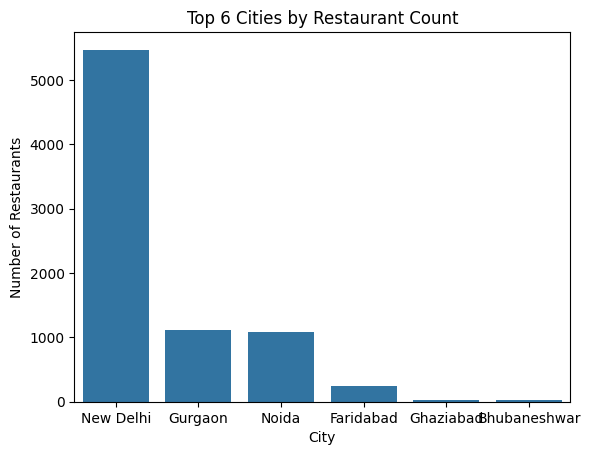

In [6]:
top6_cities = grouped.sort_values(by="Restaurant Count", ascending=False).head(6)


import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="City", y="Restaurant Count", data=top6_cities)

plt.title("Top 6 Cities by Restaurant Count")
plt.ylabel("Number of Restaurants")
plt.xlabel("City")

plt.show()


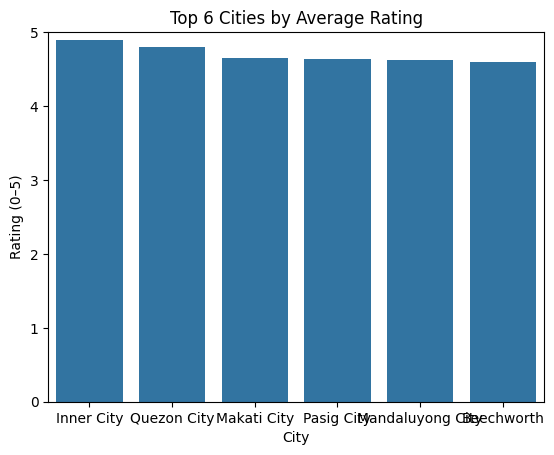

In [7]:
top6_cities = grouped.sort_values(by="Avg Rating", ascending=False).head(6)

import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(x="City", y="Avg Rating", data=top6_cities)


plt.title("Top 6 Cities by Average Rating")
plt.ylabel("Rating (0–5)")
plt.xlabel("City")
plt.ylim(0, 5)  


plt.show()
